In [5]:
import numpy as np
import pandas as pd

In [6]:
df= pd.read_excel("Cyberbullying Dataset Book1.xlsx")
df.head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [22]:
df.tail(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
159561,ffd2e85b07b3c7e4,"""\nNo he did not, read it again (I would have ...",0,0,0,0,0,0
159562,ffd72e9766c09c97,"""\n Auto guides and the motoring press are not...",0,0,0,0,0,0
159563,ffe029a7c79dc7fe,"""\nplease identify what part of BLP applies be...",0,0,0,0,0,0
159564,ffe897e7f7182c90,Catalan independentism is the social movement ...,0,0,0,0,0,0
159565,ffe8b9316245be30,The numbers in parentheses are the additional ...,0,0,0,0,0,0
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0
159570,fff46fc426af1f9a,"""\nAnd ... I really don't think you understand...",0,0,0,0,0,0


In [23]:
df.shape

(159571, 8)

## 1)Data Cleaning

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [25]:
df.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
df.duplicated().sum()

np.int64(0)

In [27]:
df.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [5]:
# Create the 'cyberbullying' column
df['cyberbullying'] = (df[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].sum(axis=1) > 0).astype(int)

# Verify the new column
print(df[['cyberbullying']].value_counts())
df.head(10)


cyberbullying
0                143346
1                 16225
Name: count, dtype: int64


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,cyberbullying
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,1
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0,0


In [ ]:
import pandas as pd
# 'cyberbullying' is the target column indicating 0 (non-cyberbullying) and 1 (cyberbullying)

# Separate the majority and minority classes
non_cyberbullying = df[df['cyberbullying'] == 0]  # Majority class
cyberbullying = df[df['cyberbullying'] == 1]      # Minority class
minority_count = cyberbullying.shape[0]
non_cyberbullying_sample = non_cyberbullying.sample(n=minority_count, random_state=42)
balanced_dataset = pd.concat([non_cyberbullying_sample, cyberbullying], axis=0)
balanced_dataset = balanced_dataset.sample(frac=1, random_state=42).reset_index(drop=True)
print(balanced_dataset['cyberbullying'].value_counts())



cyberbullying
0    16225
1    16225
Name: count, dtype: int64


## 2)EDA

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

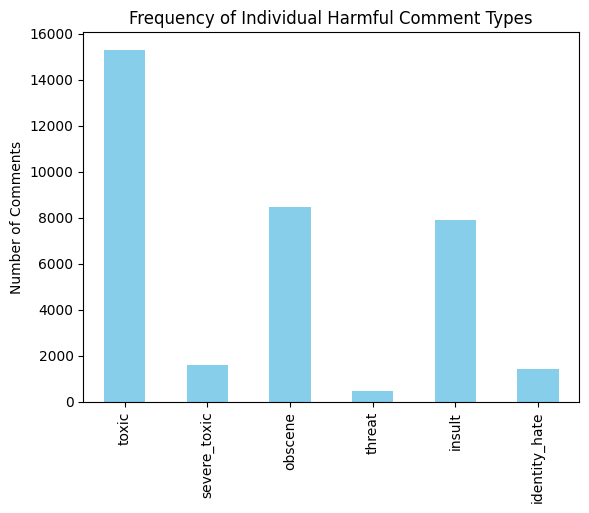

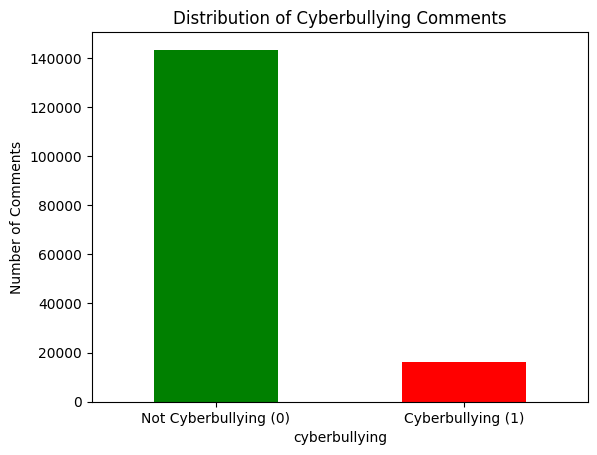

In [ ]:
# Visualizing the frequency of harmful comment types 
df[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].sum().plot(kind='bar', color='skyblue')
plt.title('Frequency of Individual Harmful Comment Types')
plt.ylabel('Number of Comments')
plt.show()

# Visualizing the distribution of the new 'cyberbullying' column
df['cyberbullying'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Distribution of Cyberbullying Comments')
plt.xticks(ticks=[0, 1], labels=['Not Cyberbullying (0)', 'Cyberbullying (1)'], rotation=0)
plt.ylabel('Number of Comments')
plt.show()


cyberbullying
0    16225
1    16225
Name: count, dtype: int64


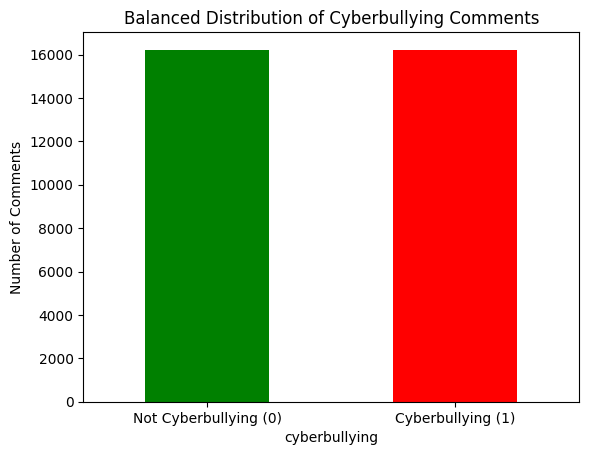

In [ ]:
# Separate the data into the two classes
cyberbullying_0 = df[df['cyberbullying'] == 0]  # Non-cyberbullying
cyberbullying_1 = df[df['cyberbullying'] == 1]  # Cyberbullying

# Perform under-sampling by selecting a random subset of the majority class (cyberbullying = 0)
cyberbullying_0_sampled = cyberbullying_0.sample(n=16225, random_state=42)  # Adjust the number to match cyberbullying = 1
new_df = pd.concat([cyberbullying_0_sampled, cyberbullying_1], axis=0)
print(new_df['cyberbullying'].value_counts())
# Visualizing the distribution of the balanced 'cyberbullying' column
new_df['cyberbullying'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Balanced Distribution of Cyberbullying Comments')
plt.xticks(ticks=[0, 1], labels=['Not Cyberbullying (0)', 'Cyberbullying (1)'], rotation=0)
plt.ylabel('Number of Comments')
plt.show()


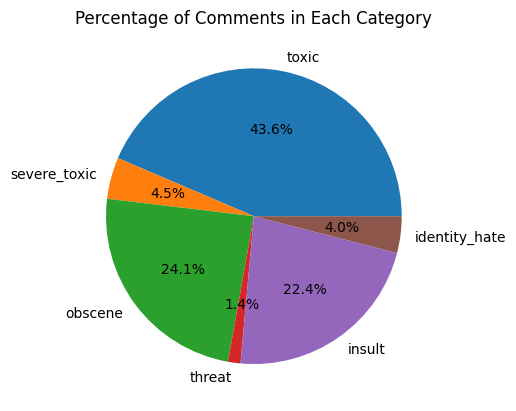

In [18]:
category_counts = df[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].sum()

# Creating the pie chart
category_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Percentage of Comments in Each Category')
plt.ylabel('') 
plt.show()


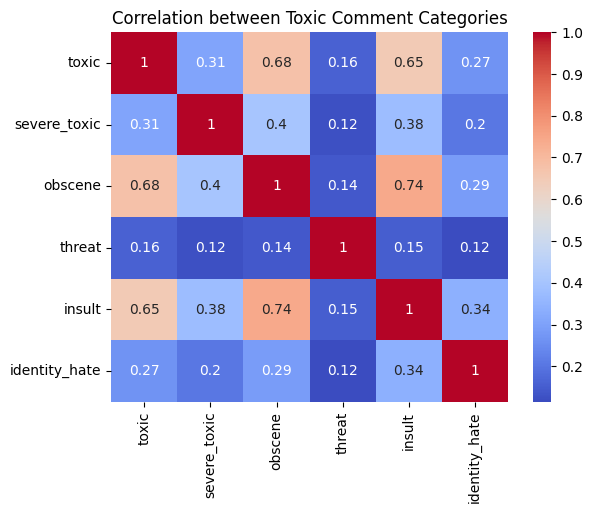

In [19]:
# Compute correlation matrix
corr_matrix = df[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].corr()

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Toxic Comment Categories')
plt.show()

## 3)Data Preprocessing

In [34]:
import nltk
from nltk.corpus import stopwords

In [ ]:
import re
import string
# Sample data
comments = [
    "Another comment here with more content...",
    "SHUT UP, YOU FAT POOP, OR I WILL KICK YOUR AS@!!!"
]
def preprocess_text(text):
    
    text = text.lower()

    text = re.sub(r'[@#$]', 'A', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    tokens = text.split()
     # Remove stop words and punctuation
    stop_words = set(stopwords.words('english'))  
    y = [word for word in tokens if word not in stop_words and word not in string.punctuation]
    return y
    
processed_comments = [preprocess_text(comment) for comment in comments]

print("Processed Comments:", processed_comments)

Processed Comments: [['another', 'comment', 'content'], ['shut', 'fat', 'poop', 'kick', 'asA']]


In [ ]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
comments = [

    "Another comment here with more content.",
    "Cyberbullying is harmful and should be addressed."
]
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(comments)
print(X.toarray())
print(vectorizer.get_feature_names_out())


[[0 0 1 0 1 1 0 0 1 0 1 0 1]
 [1 1 0 1 0 0 1 1 0 1 0 1 0]]
['addressed' 'and' 'another' 'be' 'comment' 'content' 'cyberbullying'
 'harmful' 'here' 'is' 'more' 'should' 'with']


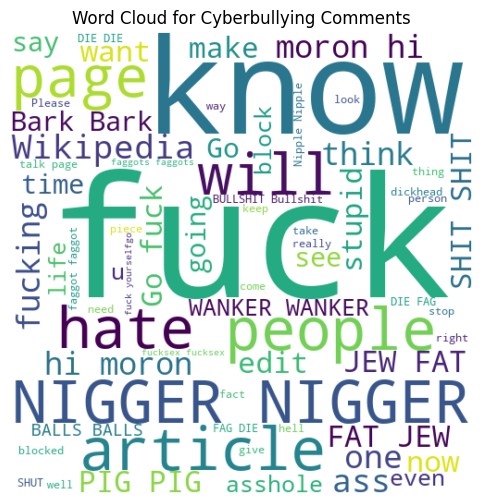

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
cyberbullying_comments = df[df['cyberbullying'] == 1]['comment_text'].str.cat(sep=" ")

# Create and display the Word Cloud for cyberbullying comments
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')
cyberbullying_wordcloud = wc.generate(cyberbullying_comments)

plt.figure(figsize=(15, 6))
plt.imshow(cyberbullying_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud for Cyberbullying Comments")
plt.show()


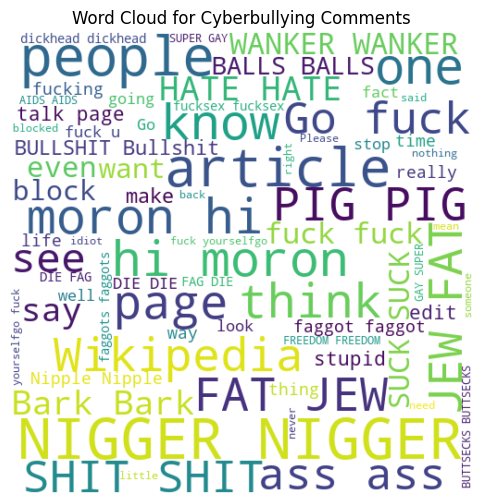

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
cyberbullying_comments = df[df['cyberbullying'] == 1]['comment_text'].str.cat(sep=" ")
stop_words = set(stopwords.words('english'))
filtered_comments = ' '.join([word for word in cyberbullying_comments.split() if word.lower() not in stop_words])
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white').generate(filtered_comments)

plt.figure(figsize=(15, 6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud for Cyberbullying Comments")
plt.show()


Splitting the data into Features & Targets

In [ ]:
X = df.drop('cyberbullying', axis=1)  # Features (everything except 'cyberbullying')
y = df['cyberbullying']  # Target (cyberbullying column)

# Display the splits
print(X.head()) 
print(y.head()) 



                 id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   

   severe_toxic  obscene  threat  insult  identity_hate  
0             0        0       0       0              0  
1             0        0       0       0              0  
2             0        0       0       0              0  
3             0        0       0       0              0  
4             0        0       0       0              0  
0    0
1    0
2    0
3    0
4    0
Name: cyberbullying, dtype: int64


Split the data into Training data & Testing Data

In [ ]:
X = df['comment_text']  # The text comments (input features)
Y = df['cyberbullying']  # The target variable (whether the comment is cyberbullying or not)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X.shape, X_train.shape, X_test.shape)



(159571,) (127656,) (31915,)


## 4)Model Selection

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
X = df['comment_text'] 
Y = df['cyberbullying']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])

print("Sample training data:\n", X_train.head())
print("Sample target labels:\n", y_train.head())

Training set size: 127656
Testing set size: 31915
Sample training data:
 140030    Grandma Terri Should Burn in Trash \nGrandma T...
159124    , 9 May 2009 (UTC)\nIt would be easiest if you...
60006     "\n\nThe Objectivity of this Discussion is dou...
65432                 Shelly Shock\nShelly Shock is. . .( )
154979    I do not care. Refer to Ong Teng Cheong talk p...
Name: comment_text, dtype: object
Sample target labels:
 140030    1
159124    0
60006     0
65432     0
154979    0
Name: cyberbullying, dtype: int64


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
model = LogisticRegression(max_iter=1000)
vectorizer = CountVectorizer(stop_words='english')  
X_train_vect = vectorizer.fit_transform(X_train)  
X_test_vect = vectorizer.transform(X_test) 
model.fit(X_train_vect, y_train)
y_pred = model.predict(X_test_vect)


accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9576
Confusion Matrix:
[[28324   347]
 [ 1006  2238]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     28671
           1       0.87      0.69      0.77      3244

    accuracy                           0.96     31915
   macro avg       0.92      0.84      0.87     31915
weighted avg       0.96      0.96      0.96     31915



In [ ]:
vectorizer = CountVectorizer(stop_words='english')  
X_train_vect = vectorizer.fit_transform(X_train)  
X_test_vect = vectorizer.transform(X_test) 

rf_model = RandomForestClassifier(n_estimators=100,class_weight='balanced',max_depth=20, random_state=42)
rf_model.fit(X_train_vect, y_train)
y_pred = rf_model.predict(X_test_vect)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Classification Report:")
print(classification_report(y_test, y_pred))






Accuracy: 0.7339
Confusion Matrix:
[[20628  8043]
 [  449  2795]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.72      0.83     28671
           1       0.26      0.86      0.40      3244

    accuracy                           0.73     31915
   macro avg       0.62      0.79      0.61     31915
weighted avg       0.91      0.73      0.79     31915



## 5)Model Training

Logistic Regression

In [4]:
model = LogisticRegression()

Model Evaluation

Accuracy Score

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

vectorizer = TfidfVectorizer()

X_train_tfidf = vectorizer.fit_transform(X_train)

model = LogisticRegression()
model.fit(X_train_tfidf, y_train)
X_train_prediction = model.predict(X_train_tfidf)

training_data_accuracy = accuracy_score(y_train, X_train_prediction)
print("Training Accuracy:", training_data_accuracy)


Training Accuracy: 0.9601820517641161


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
train_df = pd.read_excel('Cyberbullying Dataset Book1.xlsx')

train_df['label'] = train_df[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].max(axis=1)
X = train_df['comment_text']
y = train_df['label']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)
test_df = pd.read_csv('test.csv')
X_test = test_df['comment_text']
vectorizer = TfidfVectorizer()

X_train_tfidf = vectorizer.fit_transform(X_train)

X_valid_tfidf = vectorizer.transform(X_valid)
X_test_tfidf = vectorizer.transform(X_test)

model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

X_valid_prediction = model.predict(X_valid_tfidf)
validation_data_accuracy = accuracy_score(y_valid, X_valid_prediction)
print("Validation Accuracy:", validation_data_accuracy)

X_test_prediction = model.predict(X_test_tfidf)
test_df['predicted_label'] = X_test_prediction

test_df[['id', 'predicted_label']].to_csv('test_predictions.csv', index=False)
print("Test predictions saved to 'test_predictions.csv'")


Validation Accuracy: 0.956634811217296
Test predictions saved to 'test_predictions.csv'


In [ ]:
import pickle
# Save the trained model
with open('model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)
with open('vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(vectorizer, vectorizer_file)


In [3]:
import pickle

with open('model.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

with open('vectorizer.pkl', 'rb') as vectorizer_file:
    vectorizer = pickle.load(vectorizer_file)
def predict_cyberbullying(comment):
    comment_vec = vectorizer.transform([comment])
    prediction = model.predict(comment_vec)
    if prediction == 1:
        return "Cyberbullying"
    else:
        return "Not Cyberbullying"

# List of sample comments
comments = [
    "You're so dumb, I can't believe anyone listens to you.",
    "I really liked your post! Keep up the good work.",
    "Nobody cares about what you think. Shut up.",
    "That's such a beautiful picture!",
    "You are sick @ss",
    "hello what is your name",
    "You don’t deserve friends, they just pity you.",
    "You're ugly, and everyone thinks so."    
]
for comment in comments:
    result = predict_cyberbullying(comment)
    print(f"Comment: {comment}\nPrediction: {result}\n")


Comment: You're so dumb, I can't believe anyone listens to you.
Prediction: Cyberbullying

Comment: I really liked your post! Keep up the good work.
Prediction: Not Cyberbullying

Comment: Nobody cares about what you think. Shut up.
Prediction: Cyberbullying

Comment: That's such a beautiful picture!
Prediction: Not Cyberbullying

Comment: You are sick @ss
Prediction: Cyberbullying

Comment: hello what is your name
Prediction: Not Cyberbullying

Comment: You don’t deserve friends, they just pity you.
Prediction: Cyberbullying

Comment: You're ugly, and everyone thinks so.
Prediction: Cyberbullying

